In [2]:
import pandas as pd
import pylab as pb
import numpy as np
X = pd.ExcelFile('SCEI_DATA.xlsx')

In [14]:
X.describe()

,DATASET,MODEL,TIME,POSITION,VALUE
count,3.553920e+06,3.553920e+06,3.553920e+06,3.553920e+06,3.553920e+06
mean,2.000000e+00,1.100297e+01,4.532685e+00,1.526942e+03,-3.070128e-04
std,1.414214e+00,6.631682e+00,2.894767e+00,8.910816e+02,3.521721e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-7.949100e+00
25%,1.000000e+00,5.000000e+00,2.000000e+00,7.540000e+02,-1.409000e-01
50%,2.000000e+00,1.100000e+01,5.000000e+00,1.526000e+03,1.140000e-02
75%,3.000000e+00,1.700000e+01,7.000000e+00,2.299000e+03,1.573000e-01
max,4.000000e+00,2.200000e+01,1.000000e+01,3.071000e+03,7.172100e+00


In [3]:
#Il n'y a pas de données manquantes
X=X.drop(['ID','DATASET'],axis=1)
#On ne garde que les données numériques

In [4]:
#Séparation des dataset
a=710784
DATA=[X.iloc[a*k:a*(k+1),:] for k in range(5)]

In [5]:
def moy_model(dataset):
    '''Fonction qui renvoie la moyenne des prédictions de tt les modèles pour le dataset voulu'''
    A=dataset[dataset['TIME']==10] #On sélectionne les lignes avec time=10
    #A.drop(['TIME'],axis=1) #On a plus besoin de la colonne time, la valeure est la même partout
    A=A.groupby(['POSITION']).mean()#On calcule la moyenne des valeurs sur toutes les positions
    #A.drop(['MODEL'],axis=1)
    return A

#moy_model(DATA[0])['VALUE']

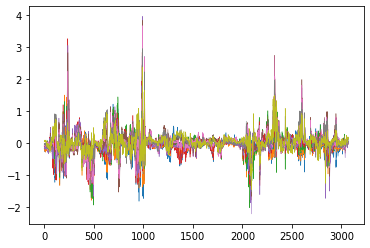

In [6]:
def graph(data,model):
    '''Fonction qui renvoie en graph (position, value) pour chacune des 10 températeures, sur un dataset et un modèle voulu'''
    A=data[data['MODEL']==model]
    for k in range (9):
        I=A[A['TIME']==k]
        pb.plot(I['POSITION'],I['VALUE'],linewidth=0.5)
        
graph(DATA[0],10)
#On constate peu de variation au cours des années, mais en revanche des modèles différentsde

In [7]:
def sortie_prediction():
    '''On sort les prédictions (t=10)'''
    L=[]
    for k in DATA:
        L.append(k[k['TIME']!=10])
    return L

In [8]:
sortie_prediction()[0]


,MODEL,TIME,POSITION,VALUE
0,0,0,0,-0.1261
1,0,0,1,-0.1504
2,0,0,2,-0.1753
3,0,0,3,-0.2156
4,0,0,4,-0.1625
...,...,...,...,...
706555,22,9,3067,-0.0440
706556,22,9,3068,-0.0145
706557,22,9,3069,0.0034
706558,22,9,3070,-0.0348


In [9]:
#On sépare les 22 modèles de chaque dataSet
a=30720
#D de 0 à 4 pour chacun des datasets, indexés par le modèles de 0 à 22
D0=[sortie_prediction()[0].iloc[a*j:a*(j+1),:] for j in range(23)]
D1=[sortie_prediction()[1].iloc[a*j:a*(j+1),:] for j in range(23)]
D2=[sortie_prediction()[2].iloc[a*j:a*(j+1),:] for j in range(23)]
D3=[sortie_prediction()[3].iloc[a*j:a*(j+1),:] for j in range(23)]
D4=[sortie_prediction()[4].iloc[a*j:a*(j+1),:] for j in range(23)]
D=[D0,D1,D2,D3,D4]


In [10]:
def reshape_mod(mod):
    """Passer de 3072 à 192 positions différentes pour un modèle donné (Di[j] est un modèle)"""
    U=[]
    R=[]
    mod=mod.pivot(index="POSITION",columns="TIME",values="VALUE")
    for k in range(192):
        U.append(mod[k*16:(k+1)*16].mean())
    return(pd.DataFrame(U))

In [11]:
X=[[reshape_mod(D[i][j]) for j in range(23)] for i in range(5)]
#X est une liste des 5 datasets, 22 modèles
X[0]

[TIME         0         1         2         3         4         5         6  \
 0    -0.214338 -0.238275 -0.218831 -0.247450 -0.275519 -0.232019 -0.198406   
 1    -0.132069 -0.142781 -0.152294 -0.158575 -0.191850 -0.151225 -0.077950   
 2    -0.268375 -0.234788 -0.254575 -0.260381 -0.307950 -0.264675 -0.241519   
 3    -0.143631 -0.104913 -0.177675 -0.182006 -0.158913 -0.124575 -0.101525   
 4    -0.006763 -0.092444 -0.053200 -0.090588 -0.065350 -0.167575 -0.170656   
 ..         ...       ...       ...       ...       ...       ...       ...   
 187   0.027363  0.059613  0.074719 -0.019287 -0.021394  0.082175  0.070969   
 188  -0.212119 -0.159812 -0.119769 -0.189069 -0.082981 -0.008763 -0.031063   
 189  -0.130913 -0.131469 -0.101738 -0.157056 -0.183537 -0.100156 -0.082231   
 190   0.017569  0.020788  0.017850 -0.062125 -0.082500 -0.007581 -0.010750   
 191  -0.012819 -0.018525 -0.029413 -0.139844 -0.172987 -0.085794 -0.072119   
 
 TIME         7         8         9  
 0    -0.190

In [12]:
#On prends maintenant le fichier cible, et on donne les valeurs pour chacune des positions
Y = pd.read_csv("train_Y.csv")
Y=Y.drop(columns=["ID","DATASET","POSITION", "VARIANCE"],axis=2) #On peur garder les colonnes dataset et position si on veut se repérer
a=192
Y=[Y.iloc[a*j:a*(j+1),:] for j in range(5)]
Y[0]
#Y est une liste de 5 dataframes des valeurs cibles des 5 datasets

,MEAN
0,0.4990
1,0.4542
2,0.7851
3,0.3708
4,0.4650
...,...
187,0.0518
188,0.1184
189,0.0961
190,0.1187


In [13]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor 
#from sklearn.linear_model import LogisticRegression
lm=LinearRegression()
xg=XGBRegressor(objective="reg:squarederror",n_estimators=100)

/home/orphila/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.23ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/orphila/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.1.36ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(


In [14]:
def resultats_graph_score(algo,dataset,modele):
    """Fonction qui renvoie la prediction et le score de chaque dataset pour chaque modèle selon l'algo choisit"""
    A=X[dataset][modele]
    B=Y[dataset]
    algo.fit(A,B)
    R=algo.score(A,B)
    predictions=algo.predict(A)
    #pb.scatter(B,predictions)
    return("score = ",R)

def resultats(algo,dataset,modele):
    """Fonction qui renvoie la prediction et le score de chaque dataset pour chaque modèle"""
    C=X[dataset][modele]
    D=Y[dataset]
    algo.fit(C,D)
    R1=algo.score(C,D)
    pred=algo.predict(C)
    return(pred)

In [15]:
#def final(algo,dataset):
    #"""Prédiciton moyenne, algo trop lent"""
    #F=[]
    #score=[]
    #for k in range(192):
        #F.append([])
    #print("F créée")  
    #for modele in range(22):
        #print("modèle n° ",modele," parcouru")
        #score.append(resultats_graph_score(algo,dataset,modele)[1])
        #for i in range(192):
            #print("point n° ",i," parcouru")
            #F[i].append(resultats(algo,dataset,modele)[i])
    #for j in range(len(F)):
        #F[j]=[np.mean(F[j]),np.var(F[j])]
        #s=np.mean(score)
    #return(F,s)

#print("score régression = ", final(lm,0)[1]," score xgboost = ",final(xg,0)[1])
#print("On constate que xgboost permet d'obtenir un bien meilleur résultat")

In [22]:
print("resultats_graph_score(xg,1,0)[1] = ",resultats_graph_score(xg,1,0)[1])
xgs=[resultats_graph_score(xg,k,0)[1] for k in range(2)]
#résultat pour les données observées
rendu=[[],[],[],[],[]]

#print("score = ",np.mean(ln))    
soumission=[]    
for k in range(2):
    rendu[k]=resultats(lm,k,0)
    for j in rendu[k]:
        soumission.append(j)
print("finito")   

resultats_graph_score(xg,1,0)[1] =  0.9999892395104865
finito


In [29]:
Y['MEAN']

0      0.4990
1      0.4542
2      0.7851
3      0.3708
4      0.4650
        ...  
955   -0.0662
956   -0.2285
957   -0.1237
958   -0.0651
959   -0.0245
Name: MEAN, Length: 960, dtype: float64

In [35]:
Y = pd.read_csv("train_Y.csv")
Z = pd.read_csv("LT.csv")
print("dim 1 = ",len(Y))
print("dim 2 = ",len(Z))

Y=Y[:384]
Y['MEAN']=soumission

for k in range (len(Y)):
    Y['MEAN'][k]=float(Y['MEAN'][k])
    
Y['VARIANCE']=[0]*384
#Y.head()
Y.to_csv('RENDU_ORPHILA_REAL.csv',index=0)

dim 1 =  960
dim 2 =  384


/tmp/ipykernel_149/2119354912.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y['MEAN'][k]=float(Y['MEAN'][k])


In [33]:
float(Y['MEAN'][0])

0.26510657016083894